## Linear Regression - Introduction

Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- This essentially means that the effects of each variable on the response are additive (but we can include new variables that represent the interaction of two variables).

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship.

**Note that I would provide the best student solution for every question as the final solution.** 

## Imports & Settings

Have a look out for the <font color='orange'>orange text </font> it indicates questions that has to be answered or code that has to be writte. The number of points for each question will appear next to it, like <font color='orange'>Question 1 (4 points) </font>. **This notebook will be assessed out of 30 points.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

: 

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression

#### Generate random data

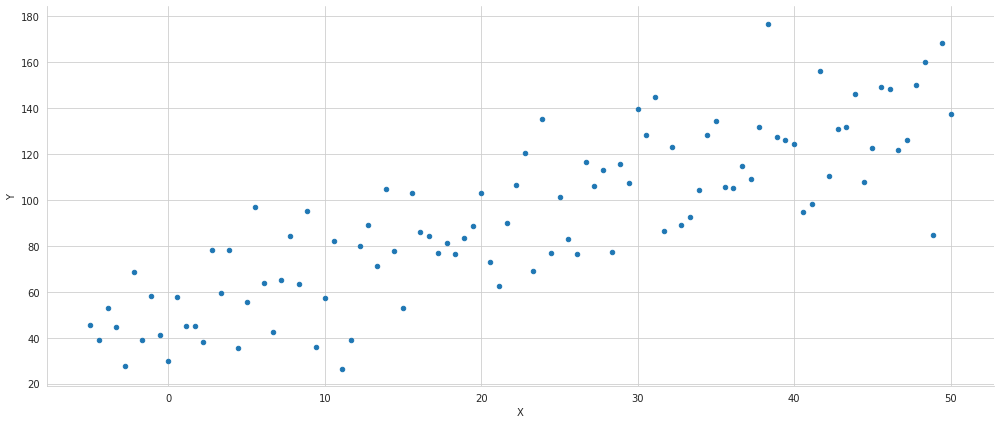

In [ ]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

<font color='orange'>Question 1: Get stock price data (4 points) </font>

Have a look at the format of the random dataframe above called *data* above, you can see what it looks like by running `data.head()`  

*   We want to create a new Pandas dataframe and have the S&P index **returns** in the X column, and Tesla **returns** in the y column; you can give the columns appropriate names.
*   The data should start on the 7th of January 2020 and stop on the 21st of January 2022.
*   The returns should be calculated on the adjusted closing price of the security.
*   The date should be set as the index so that it doesn't appear as a feature, you can use any daily date format.


### Some advice
You could use multiple open source python packages like googlefinance or yfinance. There are many places where you can learn how to use the package, I can recomend Stefan Jansen's [resource](https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/02_market_and_fundamental_data/03_data_providers/02_yfinance_demo.ipynb). Notice that this data might not be as accurate as those from paid providers.

*Note the technique I showed below might not be the easiest solution, and you need to do some additional work to get the returns out of the package.*


```python
import yfinance as yf
symbol = 'FB'
ticker = yf.Ticker(symbol)
```

You have to learn how to download Python packages, a popular method is to use `!pip install yfinance` for example

Perhaps you can even do it without a package if you know how to query and API, you can query the yahoo data directly:



```python
# yahoo url template (5 years of daily data: 2015-09-21 to 2020-09-18)
yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1442707200&period2=1600560000&interval=1d&events=history'
# get data for 3 tickers and concatenate together
tickers = ['AAPL', 'MSFT', '^GSPC']

df = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(ticker)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df = pd.concat([df, df_tmp])
df
```






In [ ]:
#### Your solution for 4 points goes into this code block (there are thousands of ways to get the data you can use any method to get to the final solution):

yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1442707200&period2=1600560000&interval=1d&events=history'
# get data for 3 tickers and concatenate together
tickers = ['AAPL', 'MSFT', '^GSPC']

df = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(ticker)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df = pd.concat([df, df_tmp])
df

#### Estimate a simple regression with statsmodels

The upper part of the summary displays the dataset characteristics, namely the estimation method, the number of observations and parameters, and indicates that standard error estimates do not account for heteroskedasticity. 

The middle panel shows the coefficient values that closely reflect the artificial data generating process. We can confirm that the estimates displayed in the middle of the summary result can be obtained using the OLS formula derived previously:

In [ ]:
## Here you can choose to assess the random dataframe, or the new return dataframe that you just created
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     228.4
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           2.39e-27
Time:                        20:25:30   Log-Likelihood:                -438.53
No. Observations:                 100   AIC:                             881.1
Df Residuals:                      98   BIC:                             886.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.5411      3.380     14.952      0.0

#### Verify calculation

In [ ]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   50.54
X        1.85
dtype: float64

#### Display model & residuals

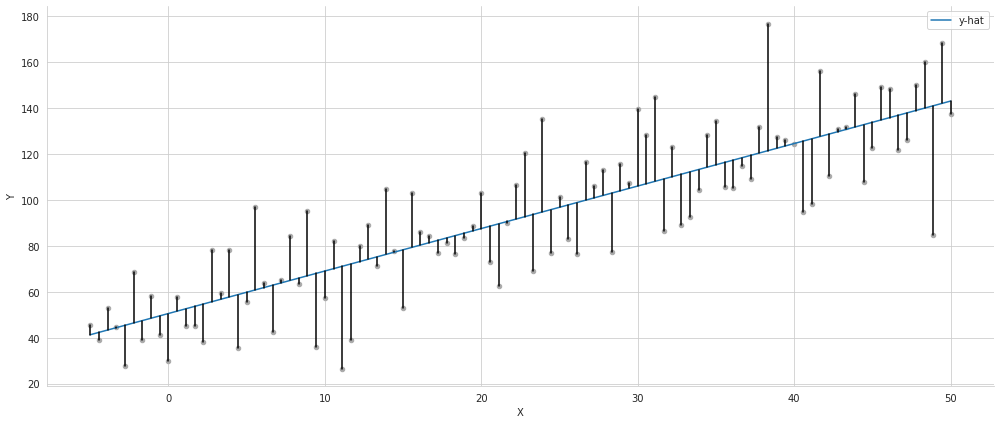

In [ ]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout();

<font color='orange'>Question 2: There is a common metric in statistics called mean squared error (MSE), define it and calculate it for the predictions above (4 points) </font>



*   You can either use the prediction using returns data or the predictions of the random data, i.e., you decide what predictions to use. 
*   I only care about your definition and the methodology you use. 



In [ ]:
## Write (code) your answers here to obtain all 4 points


### Multiple Regression


For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

#### Generate new random data

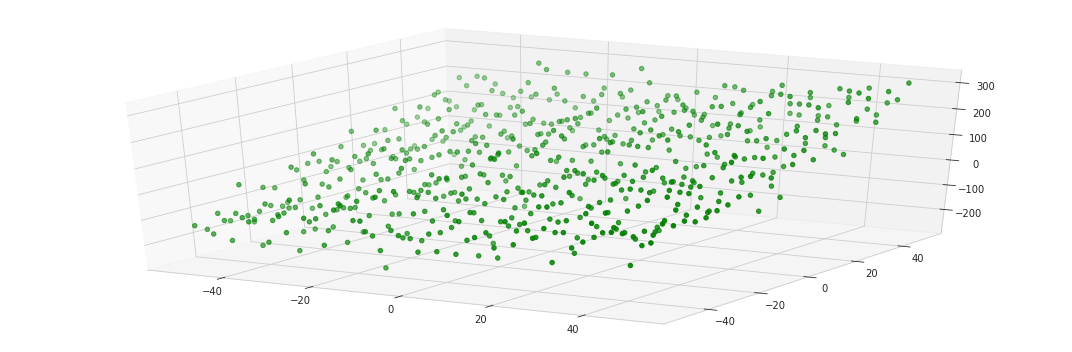

In [ ]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
sns.despine()
plt.tight_layout();

In [ ]:
X = data[['X_1', 'X_2']]
y = data['Y']

#### Estimate multiple regression model with statsmodels

The upper right part of the panel displays the goodness-of-fit measures just discussed, alongside the F-test that rejects the hypothesis that all coefficients are zero and irrelevant. Similarly, the t-statistics indicate that intercept and both slope coefficients are, unsurprisingly, highly significant.

The bottom part of the summary contains the residual diagnostics. The left panel displays skew and kurtosis that are used to test the normality hypothesis. Both the Omnibus and the Jarque—Bera test fails to reject the null hypothesis that the residuals are normally distributed. The Durbin—Watson statistic tests for serial correlation in the residuals and has a value near 2 which, given 2 parameters and 625 observations, fails to reject the hypothesis of no serial correlation.

Lastly, the condition number provides evidence about multicollinearity: it is the ratio of the square roots of the largest and the smallest eigenvalue of the design matrix that contains the input data. A value above 30 suggests that the regression may have significant multicollinearity.

In [ ]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1121.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          6.26e-207
Time:                        20:26:06   Log-Likelihood:                -3333.1
No. Observations:                 625   AIC:                             6672.
Df Residuals:                     622   BIC:                             6686.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.5665      2.009     24.176      0.0

#### Verify computation

In [ ]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   48.57
X_1      1.11
X_2      2.96
dtype: float64

#### Save output as image

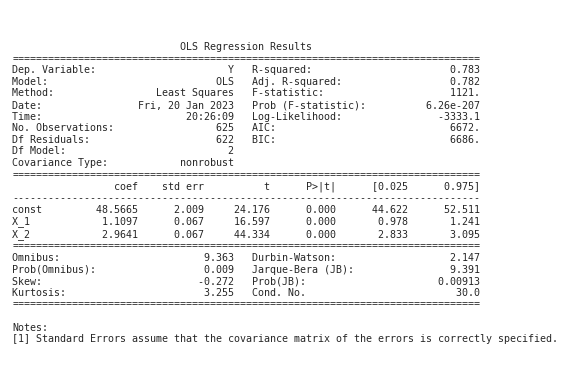

In [ ]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

#### Display model & residuals

The following diagram illustrates the hyperplane fitted by the model to the randomly generated data points

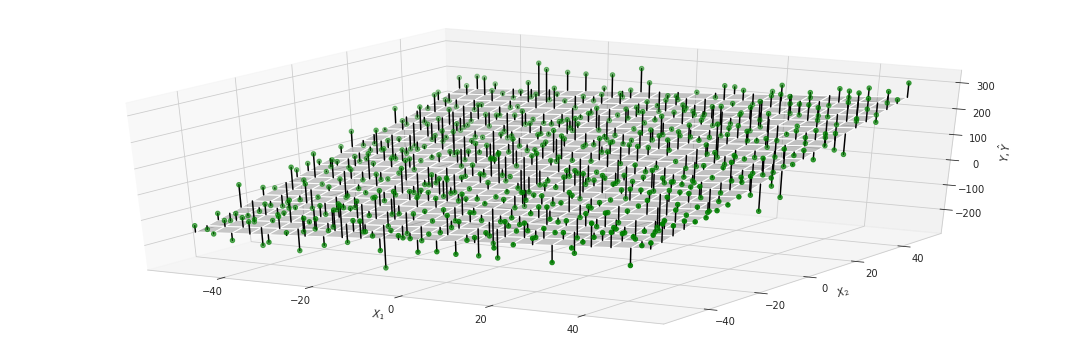

In [ ]:
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

Additional [diagnostic tests](https://www.statsmodels.org/dev/diagnostic.html)

## Stochastic Gradient Descent Regression

The sklearn library includes an SGDRegressor model in its linear_models module. To learn the parameters for the same model using this method, we need to first standardize the data because the gradient is sensitive to the scale. 

### Prepare data

The gradient is sensitive to scale and so is SGDRegressor. Use the `StandardScaler` or `scale` to adjust the features. 

We use StandardScaler() for this purpose that computes the mean and the standard deviation for each input variable during the fit step, and then subtracts the mean and divides by the standard deviation during the transform step that we can conveniently conduct in a single fit_transform() command:

In [ ]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

### Configure SGDRegressor

Then we instantiate the SGDRegressor using the default values except for a random_state setting to facilitate replication:

In [ ]:
sgd = SGDRegressor(loss='squared_loss', 
                   fit_intercept=True, 
                   shuffle=True, 
                   random_state=42,
                   learning_rate='invscaling', 
                   eta0=0.01, 
                   power_t=0.25)

### Fit Model

Now we can fit the sgd model, create the in-sample predictions for both the OLS and the sgd models, and compute the root mean squared error for each:

In [ ]:
# sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

SGDRegressor(loss='squared_loss', random_state=42)

As expected, both models yield the same result. We will now take on a more ambitious project using linear regression to estimate a multi-factor asset pricing model.

In [ ]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
pd.Series(coeffs, index=X.columns)

X_1     997.11
X_2   2,669.47
dtype: float64

In [ ]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(sm.add_constant(X))})

In [ ]:
resids.pow(2).sum().div(len(y)).pow(.5)

sgd   50.10
ols   50.10
dtype: float64

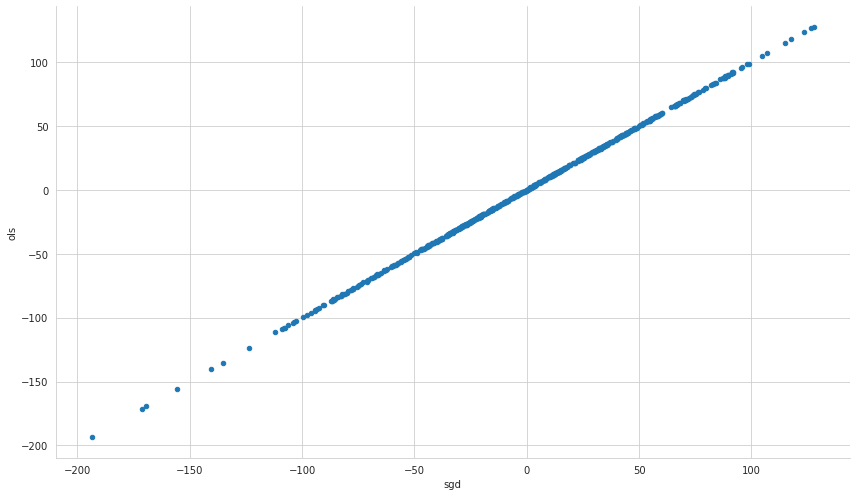

In [ ]:
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();

## How to build a linear factor model

Algorithmic trading strategies use linear factor models to quantify the relationship between the return of an asset and the sources of risk that represent the main drivers of these returns. Each factor risk carries a premium, and the total asset return can be expected to correspond to a weighted average of these risk premia.

There are several practical applications of factor models across the portfolio management process from construction and asset selection to risk management and performance evaluation. The importance of factor models continues to grow as common risk factors are now *tradeable*:

- A summary of the returns of many assets by a much smaller number of factors reduces the amount of data required to estimate the covariance matrix when optimizing a portfolio
- An estimate of the exposure of an asset or a portfolio to these factors allows for the management of the resultant risk, for instance by entering suitable hedges when risk factors are themselves traded
- A factor model also permits the assessment of the incremental signal content of new alpha factors
- A factor model can also help assess whether a manager's performance relative to a benchmark is indeed due to skill in selecting assets and timing the market, or if instead, the performance can be explained by portfolio tilts towards known return drivers that can today be replicated as low-cost, passively managed funds without incurring active management fees

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%capture
!pip install linearmodels 

Linear (regression) models for Python. Extends statsmodels with Panel regression, instrumental variable estimators, system estimators and models for estimating asset prices:

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web

from linearmodels.asset_pricing import LinearFactorModel

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

## Get Data

Fama and French make updated risk factor and research portfolio data available through their [website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html), and you can use the `pandas_datareader` package to obtain the data.

### Risk Factors

In particular, we will be using the five Fama—French factors that result from sorting stocks first into three size groups and then into two for each of the remaining three firm-specific factors. 

Hence, the factors involve three sets of value-weighted portfolios formed as 3 x 2 sorts on size and book-to-market, size and operating profitability, and size and investment. The risk factor values computed as the average returns of the portfolios (PF) as outlined in the following table:

| Label | Name                          | Description                                                                                                                                                                               |
|-------|-------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| SMB   | Small Minus Big               | Average return on the nine small stock portfolios minus the average return on the nine big stock portfolios                                                                               |
| HML   | High Minus Low                | Average return on the two value portfolios minus the average return on the two growth portfolios                                                                                          |
| RMW   | Robust minus Weak             | Average return on the two robust operating profitability portfolios minus the average return on the two weak operating profitability portfolios                                           |
| CMA   | Conservative Minus Aggressive | Average return on the two conservative investment portfolios minus the average return on the two aggressive investment portfolios                                                         |
| Rm-Rf | Excess return on the market   | Value-weight return of all firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ at the beginning of month t with 'good' data for t minus the one-month Treasury bill rate |

The Fama-French 5 factors are based on the 6 value-weight portfolios formed on size and book-to-market, the 6 value-weight portfolios formed on size and operating profitability, and the 6 value-weight portfolios formed on size and investment. We will look more into these factors in future lectures, so don't worry too much if you don't understand it yet.

We will use returns at a monthly frequency that we obtain for the period 2010 – 2017 as follows:

In [ ]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2017-12')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
 5   RF      96 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [ ]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,96.00,96.00,96.00,96.00,96.00,96.00
mean,1.16,0.06,-0.05,0.13,0.05,0.01
std,3.58,2.30,2.20,1.58,1.41,0.02
min,-7.89,-4.58,-4.70,-3.88,-3.24,0.00
25%,-0.92,-1.67,-1.67,-1.08,-0.95,0.00
50%,1.23,0.20,-0.28,0.21,0.01,0.00
75%,3.20,1.58,1.21,1.23,0.93,0.01
max,11.35,7.04,8.19,3.48,3.69,0.09


### Portfolios

Fama and French also make available numerous portfolios that we can illustrate the estimation of the factor exposures, as well as the value of the risk premia available in the market for a given time period. We will use a panel of the 17 industry portfolios at a monthly frequency. 

We will subtract the risk-free rate from the returns because the factor model works with excess returns:

In [ ]:
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2017-12')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB


In [ ]:
ff_portfolio_data.describe()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00
mean,1.05,0.20,0.60,1.40,1.15,1.30,1.19,1.74,0.56,1.35,1.22,1.28,1.46,0.90,1.23,1.25,1.29
std,2.80,7.90,5.48,5.02,5.16,5.59,3.14,5.24,7.39,4.69,4.80,5.72,4.14,3.23,3.51,4.84,3.70
min,-5.17,-24.38,-11.68,-10.00,-13.16,-17.39,-7.15,-14.16,-20.49,-11.96,-9.07,-11.65,-8.56,-6.99,-9.18,-11.14,-7.89
25%,-0.79,-5.84,-3.12,-1.87,-2.10,-1.44,-0.85,-2.41,-4.39,-1.45,-2.06,-1.25,-0.81,-0.74,-0.95,-1.46,-1.09
50%,0.92,-0.44,0.98,1.16,1.23,1.44,1.46,2.17,0.66,1.48,1.52,0.64,1.48,1.24,0.86,1.91,1.66
75%,3.19,5.73,4.15,3.86,4.16,4.44,3.30,5.56,4.21,3.84,4.58,4.80,4.24,2.96,3.37,4.10,3.48
max,6.67,21.94,15.94,17.19,16.61,18.37,8.26,15.51,21.35,17.66,14.75,20.86,12.98,7.84,12.44,13.41,10.77


### Equity Data

<font color='orange'>Question 3: You are going to work with large files in financial machine learning applications, as such you should show that you can extract compressed files (4 points) </font>

link: `https://open-data.s3.filebase.com/WIKI_PRICES_212b326a081eacca455e13140d7bb9db.zip`

*   Once more you can use any method and library that you please, i will simply provide you with the compressed link.
*   The final csv file that you extract has to be renamed as ``wiki_prices.csv`` then you can succesfully run the code below.
*   Note we don't know all the solutions, so stackoverflow and google are your friends, use them!
*   Hint, you might want to learn how to `!wget` to download the file directly to the notebook, and how to use `!mv` to rename the file.
*   We use the `!` command when we want to speak directly to the terminal.





In [ ]:
## Provide your solution here (first perform the wget command)


In [ ]:
## Provide your solution here (then unzip the file)


In [ ]:
!mv WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv wiki_prices.csv

In [ ]:
quandl_archive = (pd.read_csv('wiki_prices.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True).sort_index())
prices = quandl_archive.adj_close.unstack().loc['2010':'2017']

In [ ]:
equities = pd.read_csv('https://raw.githubusercontent.com/stefan-jansen/machine-learning-for-trading/f881ea01ef8ae5a308ab75de833ba24bee27435e/data/us_equities_meta_data.csv')
equities = equities.set_index('ticker').drop_duplicates()

In [ ]:
sectors = equities.filter(prices.columns, axis=0).sector.to_dict()
prices = prices.filter(sectors.keys()).dropna(how='all', axis=1)

In [ ]:
returns = prices.resample('M').last().pct_change().mul(100).to_period('M')
returns = returns.dropna(how='all').dropna(axis=1)
returns.info()

### Align data

In [ ]:
ff_factor_data = ff_factor_data.loc[returns.index]
ff_portfolio_data = ff_portfolio_data.loc[returns.index]

In [ ]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,1.206316,0.051053,-0.055789,0.139789,0.048842,0.012737
std,3.568555,2.302701,2.202892,1.593750,1.416798,0.022665
min,-7.890000,-4.510000,-4.520000,-3.930000,-3.350000,0.000000
25%,-0.565000,-1.670000,-1.655000,-0.965000,-0.990000,0.000000
50%,1.290000,0.150000,-0.360000,0.140000,-0.020000,0.000000
75%,3.265000,1.555000,1.165000,1.140000,0.935000,0.010000
max,11.350000,6.800000,8.220000,3.530000,3.780000,0.090000


### Compute excess Returns

In [ ]:
excess_returns = returns.sub(ff_factor_data.RF, axis=0)
excess_returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Columns: 1986 entries, A to ZUMZ
dtypes: float64(1986)
memory usage: 1.4 MB


In [ ]:
excess_returns = excess_returns.clip(lower=np.percentile(excess_returns, 1),
                                     upper=np.percentile(excess_returns, 99))

## Fama-Macbeth Regression

Given data on risk factors and portfolio returns, it is useful to estimate the portfolio's exposure, that is, how much the risk factors drive portfolio returns, as well as how much the exposure to a given factor is worth, that is, the what market's risk factor premium is. The risk premium then permits to estimate the return for any portfolio provided the factor exposure is known or can be assumed.

In [ ]:
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    95 non-null     float64
 1   Mines   95 non-null     float64
 2   Oil     95 non-null     float64
 3   Clths   95 non-null     float64
 4   Durbl   95 non-null     float64
 5   Chems   95 non-null     float64
 6   Cnsum   95 non-null     float64
 7   Cnstr   95 non-null     float64
 8   Steel   95 non-null     float64
 9   FabPr   95 non-null     float64
 10  Machn   95 non-null     float64
 11  Cars    95 non-null     float64
 12  Trans   95 non-null     float64
 13  Utils   95 non-null     float64
 14  Rtail   95 non-null     float64
 15  Finan   95 non-null     float64
 16  Other   95 non-null     float64
dtypes: float64(17)
memory usage: 13.4 KB


In [ ]:
ff_factor_data = ff_factor_data.drop('RF', axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  95 non-null     float64
 1   SMB     95 non-null     float64
 2   HML     95 non-null     float64
 3   RMW     95 non-null     float64
 4   CMA     95 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB


To address the inference problem caused by the correlation of the residuals, Fama and MacBeth proposed a two-step methodology for a cross-sectional regression of returns on factors. The two-stage Fama—Macbeth regression is designed to estimate the premium rewarded for the exposure to a particular risk factor by the market. The two stages consist of:

- First stage: N time-series regression, one for each asset or portfolio, of its excess returns on the factors to estimate the factor loadings.

- Second stage: T cross-sectional regression, one for each time period, to estimate the risk premium.

See corresponding section in Chapter 7 of [Machine Learning for Trading](https://www.amazon.com/Hands-Machine-Learning-Algorithmic-Trading-ebook/dp/B07JLFH7C5/ref=sr_1_2?ie=UTF8&qid=1548455634&sr=8-2&keywords=machine+learning+algorithmic+trading) for details.

Now we can compute the factor risk premia as the time average and get t-statistic to assess their individual significance, using the assumption that the risk premia estimates are independent over time.

If we had a very large and representative data sample on traded risk factors we could use the sample mean as a risk premium estimate. However, we typically do not have a sufficiently long history to and the margin of error around the sample mean could be quite large. 

The Fama—Macbeth methodology leverages the covariance of the factors with other assets to determine the factor premia. The second moment of asset returns is easier to estimate than the first moment, and obtaining more granular data improves estimation considerably, which is not true of mean estimation.

### Step 1: Factor Exposures

We can implement the first stage to obtain the 17 factor loading estimates as follows:

In [ ]:
betas = []
for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry], 
                exog=add_constant(ff_factor_data)).fit()
    betas.append(step1.params.drop('const'))

In [ ]:
betas = pd.DataFrame(betas, 
                     columns=ff_factor_data.columns, 
                     index=ff_portfolio_data.columns)
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Food  to Other
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  17 non-null     float64
 1   SMB     17 non-null     float64
 2   HML     17 non-null     float64
 3   RMW     17 non-null     float64
 4   CMA     17 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


### Step 2: Risk Premia

For the second stage, we run 96 regressions of the period returns for the cross section of portfolios on the factor loadings

In [ ]:
lambdas = []
for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index], 
                exog=betas).fit()
    lambdas.append(step2.params)

In [ ]:
lambdas = pd.DataFrame(lambdas, 
                       index=ff_portfolio_data.index,
                       columns=betas.columns.tolist())
lambdas.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  95 non-null     float64
 1   SMB     95 non-null     float64
 2   HML     95 non-null     float64
 3   RMW     95 non-null     float64
 4   CMA     95 non-null     float64
dtypes: float64(5)
memory usage: 9.3 KB


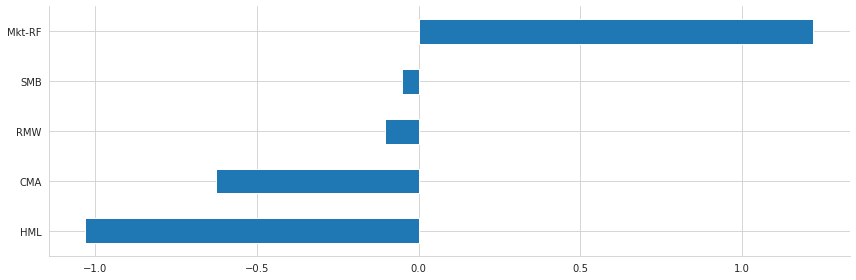

In [ ]:
lambdas.mean().sort_values().plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout();

In [ ]:
t = lambdas.mean().div(lambdas.std())
t

Mkt-RF    0.340179
SMB      -0.013216
HML      -0.261636
RMW      -0.035186
CMA      -0.172461
dtype: float64

#### Results

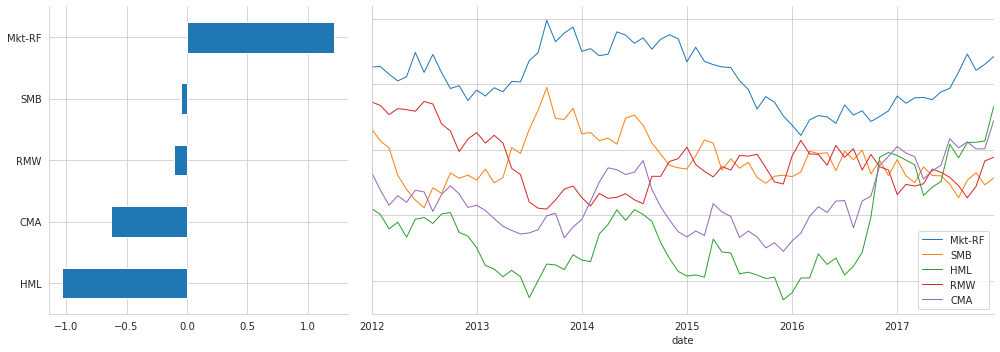

In [ ]:
window = 24  # months
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
lambdas.mean().sort_values().plot.barh(ax=ax1)
lambdas.rolling(window).mean().dropna().plot(lw=1,
                                             figsize=(14, 5),
                                             sharey=True,
                                             ax=ax2)
sns.despine()
plt.tight_layout()

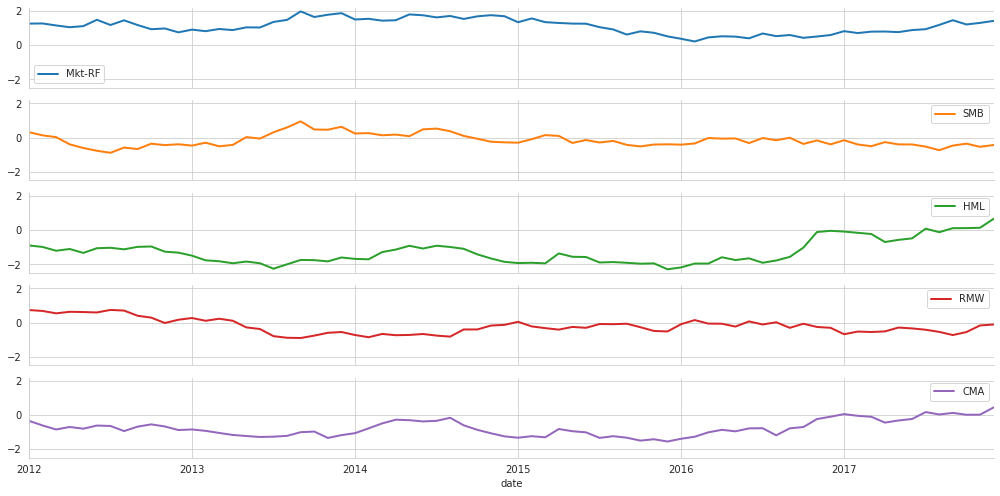

In [ ]:
window = 24  # months
lambdas.rolling(window).mean().dropna().plot(lw=2,
                                             figsize=(14, 7),
                                             subplots=True,
                                             sharey=True)
sns.despine()
plt.tight_layout()

## Fama-Macbeth with the LinearModels library

The linear_models library extends statsmodels with various models for panel data and also implements the two-stage Fama—MacBeth procedure:

In [ ]:
mod = LinearFactorModel(portfolios=ff_portfolio_data, 
                        factors=ff_factor_data)
res = mod.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6885
No. Factors:                          5   J-statistic:                    17.038
No. Observations:                    95   P-value                         0.1482
Date:                  Thu, Apr 15 2021   Distribution:                 chi2(12)
Time:                          14:55:21                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.2208     0.4076     2.9951     0.0027      0.4219      2.0197
SMB           -0.0523     0.7979    

In [ ]:
print(res.full_summary)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6885
No. Factors:                          5   J-statistic:                    17.038
No. Observations:                    95   P-value                         0.1482
Date:                  Thu, Apr 15 2021   Distribution:                 chi2(12)
Time:                          14:55:21                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.2208     0.4076     2.9951     0.0027      0.4219      2.0197
SMB           -0.0523     0.7979    

This provides us with the same result:

In [ ]:
lambdas.mean()

Mkt-RF    1.220797
SMB      -0.052301
HML      -1.031603
RMW      -0.104427
CMA      -0.625245
dtype: float64

# Preparing Alpha Factors and Features to predict Stock Returns

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr
from talib import RSI, BBANDS, MACD, ATR

ModuleNotFoundError: ignored

In [ ]:
## Notice how you first have to install some libraries that don't exist in Colab by default

!pip install TA-Lib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.7 MB/s eta 0:00:00


In [ ]:
from talib import RSI, BBANDS, MACD, ATR

In [ ]:
MONTH = 21
YEAR = 12 * MONTH

In [ ]:
START = '2013-01-01'
END = '2017-12-31'

In [ ]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Loading Quandl Wiki Stock Prices & Meta Data

In [ ]:
ohlcv = ['adj_open', 'adj_close', 'adj_low', 'adj_high', 'adj_volume']

In [ ]:
!wget "https://open-data.s3.filebase.com/WIKI_PRICES_212b326a081eacca455e13140d7bb9db.zip"

--2023-01-20 20:35:02--  https://open-data.s3.filebase.com/WIKI_PRICES_212b326a081eacca455e13140d7bb9db.zip
Resolving open-data.s3.filebase.com (open-data.s3.filebase.com)... 51.81.66.104, 51.81.56.185, 51.81.107.75
Connecting to open-data.s3.filebase.com (open-data.s3.filebase.com)|51.81.66.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 463198483 (442M) [application/x-zip-compressed]
Saving to: ‘WIKI_PRICES_212b326a081eacca455e13140d7bb9db.zip’

WIKI_PRICES_212b326 100%[===================>] 441.74M  3.58MB/s    in 2m 6s   

2023-01-20 20:37:09 (3.51 MB/s) - ‘WIKI_PRICES_212b326a081eacca455e13140d7bb9db.zip’ saved [463198483/463198483]



In [ ]:
## This could help you for a past problem ;) 
import zipfile
path_to_zip_file = "WIKI_PRICES_212b326a081eacca455e13140d7bb9db.zip"
directory_to_extract_to = ""
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
!mv WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv wiki_prices.csv

In [ ]:
df = (pd.read_csv('wiki_prices.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True)
     .sort_index())

In [ ]:
prices = (df
          .loc[idx[START:END, :], ohlcv]
          .rename(columns=lambda x: x.replace('adj_', ''))
          .assign(volume=lambda x: x.volume.div(1000))
          .swaplevel()
          .sort_index())
df = pd.read_csv('https://raw.githubusercontent.com/stefan-jansen/machine-learning-for-trading/f881ea01ef8ae5a308ab75de833ba24bee27435e/data/us_equities_meta_data.csv')

stocks = (df.set_index("ticker")
          .loc[:, ['marketcap', 'ipoyear', 'sector']])

## Remove stocks with few observations

In [ ]:
# want at least 2 years of data
min_obs = 2 * YEAR

# have this much per ticker 
nobs = prices.groupby(level='ticker').size()

# keep those that exceed the limit
keep = nobs[nobs > min_obs].index

prices = prices.loc[idx[keep, :], :] ## yes this takes very long

### Align price and meta data

In [ ]:
stocks = stocks[~stocks.index.duplicated() & stocks.sector.notnull()]
stocks.sector = stocks.sector.str.lower().str.replace(' ', '_')
stocks.index.name = 'ticker'

In [ ]:
shared = (prices.index.get_level_values('ticker').unique()
          .intersection(stocks.index))
stocks = stocks.loc[shared, :]
prices = prices.loc[idx[shared, :], :] ## yes this takes very long

In [ ]:
prices.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   open    2904233 non-null  float64
 1   close   2904233 non-null  float64
 2   low     2904233 non-null  float64
 3   high    2904233 non-null  float64
 4   volume  2904233 non-null  float64
dtypes: float64(5)
memory usage: 122.6+ MB


In [ ]:
stocks.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2348 entries, A to ZUMZ
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   marketcap  2345 non-null   float64
 1   ipoyear    1026 non-null   float64
 2   sector     2348 non-null   object 
dtypes: float64(2), object(1)
memory usage: 73.4+ KB


In [ ]:
stocks.sector.value_counts()

consumer_services        440
finance                  393
technology               297
health_care              297
capital_goods            227
basic_industries         138
consumer_non-durables    126
energy                   123
public_utilities         105
consumer_durables         78
miscellaneous             69
transportation            55
Name: sector, dtype: int64

Optional: persist intermediate results:

In [ ]:
# with pd.HDFStore('tmp.h5') as store:
#     store.put('prices', prices)
#     store.put('stocks', stocks)

In [ ]:
# with pd.HDFStore('tmp.h5') as store:
#     prices = store['prices']
#     stocks = store['stocks']

## Compute Rolling Average Dollar Volume

In [ ]:
# compute dollar volume to determine universe
prices['dollar_vol'] = prices[['close', 'volume']].prod(axis=1)

In [ ]:
prices['dollar_vol_1m'] = (prices.dollar_vol.groupby('ticker')
                           .rolling(window=21)
                           .mean()).values

In [ ]:
prices.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   open           2904233 non-null  float64
 1   close          2904233 non-null  float64
 2   low            2904233 non-null  float64
 3   high           2904233 non-null  float64
 4   volume         2904233 non-null  float64
 5   dollar_vol     2904233 non-null  float64
 6   dollar_vol_1m  2857273 non-null  float64
dtypes: float64(7)
memory usage: 166.9+ MB


In [ ]:
prices['dollar_vol_rank'] = (prices.groupby('date')
                             .dollar_vol_1m
                             .rank(ascending=False))

In [ ]:
prices.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   open             2904233 non-null  float64
 1   close            2904233 non-null  float64
 2   low              2904233 non-null  float64
 3   high             2904233 non-null  float64
 4   volume           2904233 non-null  float64
 5   dollar_vol       2904233 non-null  float64
 6   dollar_vol_1m    2857273 non-null  float64
 7   dollar_vol_rank  2857273 non-null  float64
dtypes: float64(8)
memory usage: 189.1+ MB


## Add some Basic Factors

### Compute the Relative Strength Index

In [ ]:
prices['rsi'] = prices.groupby(level='ticker').close.apply(RSI)

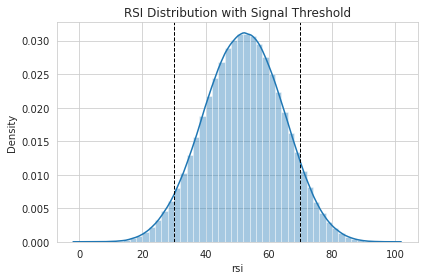

In [ ]:
ax = sns.distplot(prices.rsi.dropna())
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('RSI Distribution with Signal Threshold')
plt.tight_layout();

### Compute Bollinger Bands

In [ ]:
def compute_bb(close):
    high, mid, low = BBANDS(close, timeperiod=20)
    return pd.DataFrame({'bb_high': high, 'bb_low': low}, index=close.index)

In [ ]:
prices = (prices.join(prices
                      .groupby(level='ticker')
                      .close
                      .apply(compute_bb)))

In [ ]:
prices['bb_high'] = prices.bb_high.sub(prices.close).div(prices.bb_high).apply(np.log1p)
prices['bb_low'] = prices.close.sub(prices.bb_low).div(prices.close).apply(np.log1p)

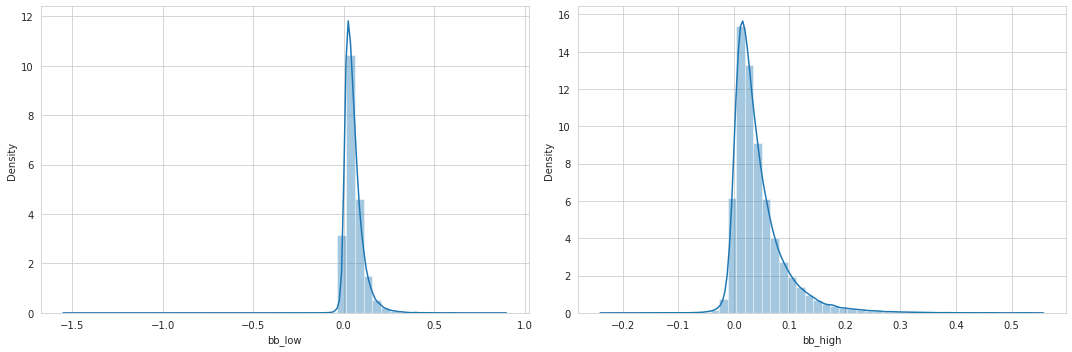

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(prices.loc[prices.dollar_vol_rank<100, 'bb_low'].dropna(), ax=axes[0])
sns.distplot(prices.loc[prices.dollar_vol_rank<100, 'bb_high'].dropna(), ax=axes[1])
plt.tight_layout();

### Compute Average True Range

In [ ]:
def compute_atr(stock_data):
    df = ATR(stock_data.high, stock_data.low, 
             stock_data.close, timeperiod=14)
    return df.sub(df.mean()).div(df.std())

In [ ]:
prices['atr'] = (prices.groupby('ticker', group_keys=False)
                 .apply(compute_atr))

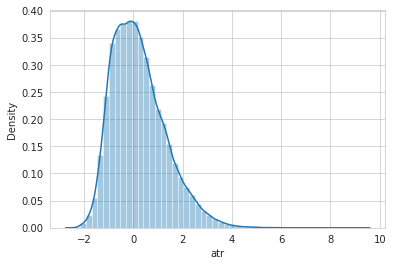

In [ ]:
sns.distplot(prices[prices.dollar_vol_rank<50].atr.dropna());

### Compute Moving Average Convergence/Divergence

In [ ]:
def compute_macd(close):
    macd = MACD(close)[0]
    return (macd - np.mean(macd))/np.std(macd)

In [ ]:
prices['macd'] = (prices
                  .groupby('ticker', group_keys=False)
                  .close
                  .apply(compute_macd))

In [ ]:
prices.macd.describe(percentiles=[.001, .01, .02, .03, .04, .05, .95, .96, .97, .98, .99, .999]).apply(lambda x: f'{x:,.1f}')

count    2,826,749.0
mean             0.0
std              1.0
min            -10.5
0.1%            -4.1
1%              -2.6
2%              -2.2
3%              -2.0
4%              -1.8
5%              -1.6
50%              0.0
95%              1.6
96%              1.7
97%              1.9
98%              2.1
99%              2.6
99.9%            4.0
max              8.7
Name: macd, dtype: object

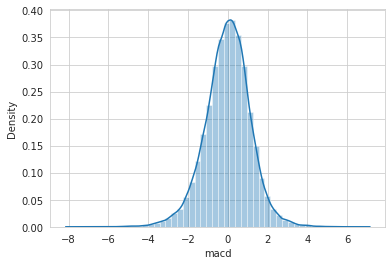

In [ ]:
sns.distplot(prices[prices.dollar_vol_rank<100].macd.dropna());

<font color='orange'>Question 4: You are asked to create two more technical factors like the MACD, ATR, RSI, and BB methods above (8 points) </font>


*   You are not allowed to use the same technical indicators as used above, you have to employ a different technical indicator.
*   You can use the talib library as is used above, or you can hand-craft your own methods or use any other libraries. 
*   After developing the method you should remember to apply it to the data to get full points.



In [ ]:
## go ahead and try it here


## Compute Lagged Returns

In [ ]:
lags = [1, 5, 10, 21, 42, 63]

In [ ]:
returns = prices.groupby(level='ticker').close.pct_change()
percentiles=[.0001, .001, .01]
percentiles+= [1-p for p in percentiles]
returns.describe(percentiles=percentiles).iloc[2:].to_frame('percentiles').style.format(lambda x: f'{x:,.2%}')

,percentiles
std,9.37%
min,-87.62%
0.01%,-33.40%
0.1%,-14.78%
1%,-6.52%
50%,0.04%
99%,6.98%
99.9%,17.03%
99.99%,39.25%
max,"10,280.40%"


In [ ]:
q = 0.0001

### Winsorize outliers

In [ ]:
for lag in lags:
    prices[f'return_{lag}d'] = (prices.groupby(level='ticker').close
                                .pct_change(lag)
                                .pipe(lambda x: x.clip(lower=x.quantile(q),
                                                       upper=x.quantile(1 - q)))
                                .add(1)
                                .pow(1 / lag)
                                .sub(1)
                                )

### Shift lagged returns

In [ ]:
for t in [1, 2, 3, 4, 5]:
    for lag in [1, 5, 10, 21]:
        prices[f'return_{lag}d_lag{t}'] = (prices.groupby(level='ticker')
                                           [f'return_{lag}d'].shift(t * lag))

## Compute Forward Returns

In [ ]:
for t in [1, 5, 10, 21]:
    prices[f'target_{t}d'] = prices.groupby(level='ticker')[f'return_{t}d'].shift(-t)

## Combine Price and Meta Data

In [ ]:
prices = prices.join(stocks[['sector']])

## Create time and sector dummy variables

In [ ]:
prices['year'] = prices.index.get_level_values('date').year
prices['month'] = prices.index.get_level_values('date').month

In [ ]:
prices.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 46 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   open             2904233 non-null  float64
 1   close            2904233 non-null  float64
 2   low              2904233 non-null  float64
 3   high             2904233 non-null  float64
 4   volume           2904233 non-null  float64
 5   dollar_vol       2904233 non-null  float64
 6   dollar_vol_1m    2857273 non-null  float64
 7   dollar_vol_rank  2857273 non-null  float64
 8   rsi              2871361 non-null  float64
 9   bb_high          2859618 non-null  float64
 10  bb_low           2859585 non-null  float64
 11  atr              2871361 non-null  float64
 12  macd             2826749 non-null  float64
 13  return_1d        2901885 non-null  float64
 14  return_5d        2892493 non-null  float6

In [ ]:
prices.assign(sector=pd.factorize(prices.sector, sort=True)[0]).to_hdf('data.h5', 'model_data/no_dummies')

In [ ]:
prices = pd.get_dummies(prices,
                        columns=['year', 'month', 'sector'],
                        prefix=['year', 'month', ''],
                        prefix_sep=['_', '_', ''],
                        drop_first=True)

In [ ]:
prices.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2904233 entries, ('A', Timestamp('2013-01-02 00:00:00')) to ('ZUMZ', Timestamp('2017-12-29 00:00:00'))
Data columns (total 69 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   open                   2904233 non-null  float64
 1   close                  2904233 non-null  float64
 2   low                    2904233 non-null  float64
 3   high                   2904233 non-null  float64
 4   volume                 2904233 non-null  float64
 5   dollar_vol             2904233 non-null  float64
 6   dollar_vol_1m          2857273 non-null  float64
 7   dollar_vol_rank        2857273 non-null  float64
 8   rsi                    2871361 non-null  float64
 9   bb_high                2859618 non-null  float64
 10  bb_low                 2859585 non-null  float64
 11  atr                    2871361 non-null  float64
 12  macd                   2826749 non-null  float64
 13 

## Store Model Data

In [ ]:
prices.to_hdf('data.h5', 'model_data')

## Explore Data

### Plot Factors

In [ ]:
target = 'target_5d'
top100 = prices[prices.dollar_vol_rank<100].copy()

### RSI

In [ ]:
top100.loc[:, 'rsi_signal'] = pd.cut(top100.rsi, bins=[0, 30, 70, 100])

In [ ]:
top100.groupby('rsi_signal')['target_5d'].describe()

,count,mean,std,min,25%,50%,75%,max
rsi_signal,,,,,,,,
"(0, 30]","4,209.00",0.00,0.01,-0.07,-0.00,0.00,0.01,0.06
"(30, 70]","107,244.00",0.00,0.01,-0.17,-0.00,0.00,0.00,0.08
"(70, 100]","10,634.00",0.00,0.01,-0.09,-0.00,0.00,0.00,0.06


### Bollinger Bands

-2.68% (0.00%)


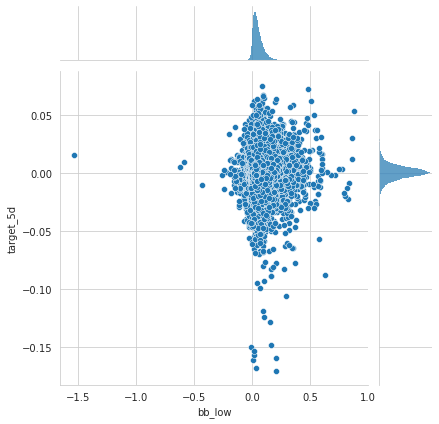

In [ ]:
metric = 'bb_low'
j=sns.jointplot(x=metric, y=target, data=top100)

df = top100[[metric, target]].dropna()
r, p = spearmanr(df[metric], df[target])
print(f'{r:,.2%} ({p:.2%})')

4.21% (0.00%)


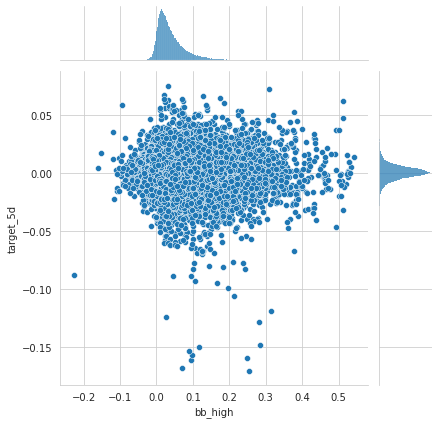

In [ ]:
metric = 'bb_high'
j=sns.jointplot(x=metric, y=target, data=top100)

df = top100[[metric, target]].dropna()
r, p = spearmanr(df[metric], df[target])
print(f'{r:,.2%} ({p:.2%})')

### ATR

0.07% (80.08%)


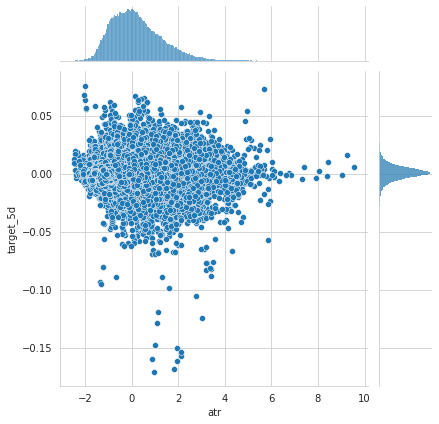

In [ ]:
metric = 'atr'
j=sns.jointplot(x=metric, y=target, data=top100)

df = top100[[metric, target]].dropna()
r, p = spearmanr(df[metric], df[target])
print(f'{r:,.2%} ({p:.2%})')

### MACD

-4.72% (0.00%)


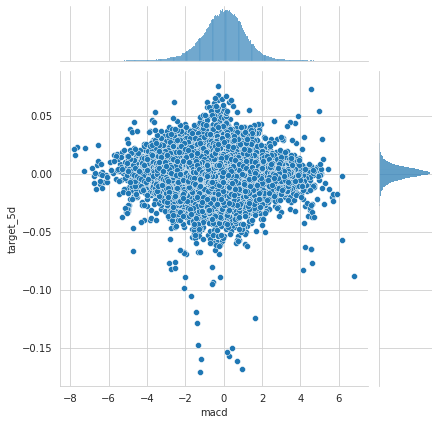

In [ ]:
metric = 'macd'
j=sns.jointplot(x=metric, y=target, data=top100)

df = top100[[metric, target]].dropna()
r, p = spearmanr(df[metric], df[target])
print(f'{r:,.2%} ({p:.2%})')

# Statistical inference of stock returns with linear regression

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

import pandas as pd

from statsmodels.api import OLS, add_constant, graphics
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## Load Data

In [ ]:
with pd.HDFStore('data.h5') as store:
    data = (store['model_data']
            .dropna()
            .drop(['open', 'close', 'low', 'high'], axis=1))

### Select Investment Universe

In [ ]:
data = data[data.dollar_vol_rank<100]

In [ ]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109675 entries, ('AAL', Timestamp('2013-07-25 00:00:00')) to ('ZTS', Timestamp('2014-12-04 00:00:00'))
Data columns (total 65 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   volume                 109675 non-null  float64
 1   dollar_vol             109675 non-null  float64
 2   dollar_vol_1m          109675 non-null  float64
 3   dollar_vol_rank        109675 non-null  float64
 4   rsi                    109675 non-null  float64
 5   bb_high                109675 non-null  float64
 6   bb_low                 109675 non-null  float64
 7   atr                    109675 non-null  float64
 8   macd                   109675 non-null  float64
 9   return_1d              109675 non-null  float64
 10  return_5d              109675 non-null  float64
 11  return_10d             109675 non-null  float64
 12  return_21d             109675 non-null  float64
 13  return_42d    

### Create Model Data

In [ ]:
y = data.filter(like='target')
X = data.drop(y.columns, axis=1)
X = X.drop(['dollar_vol', 'dollar_vol_rank', 'volume', 'consumer_durables'], axis=1)

## Explore Data

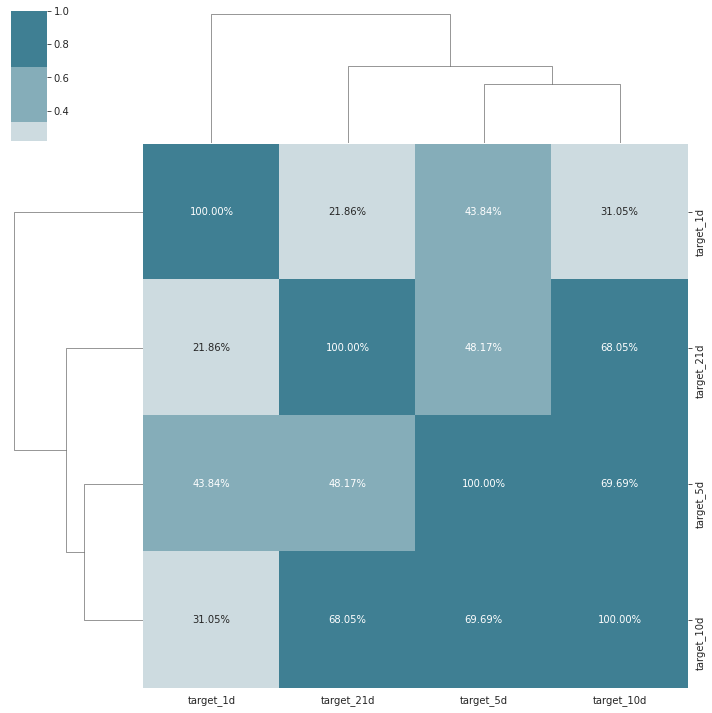

In [ ]:
sns.clustermap(y.corr(), cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0, annot=True, fmt='.2%');

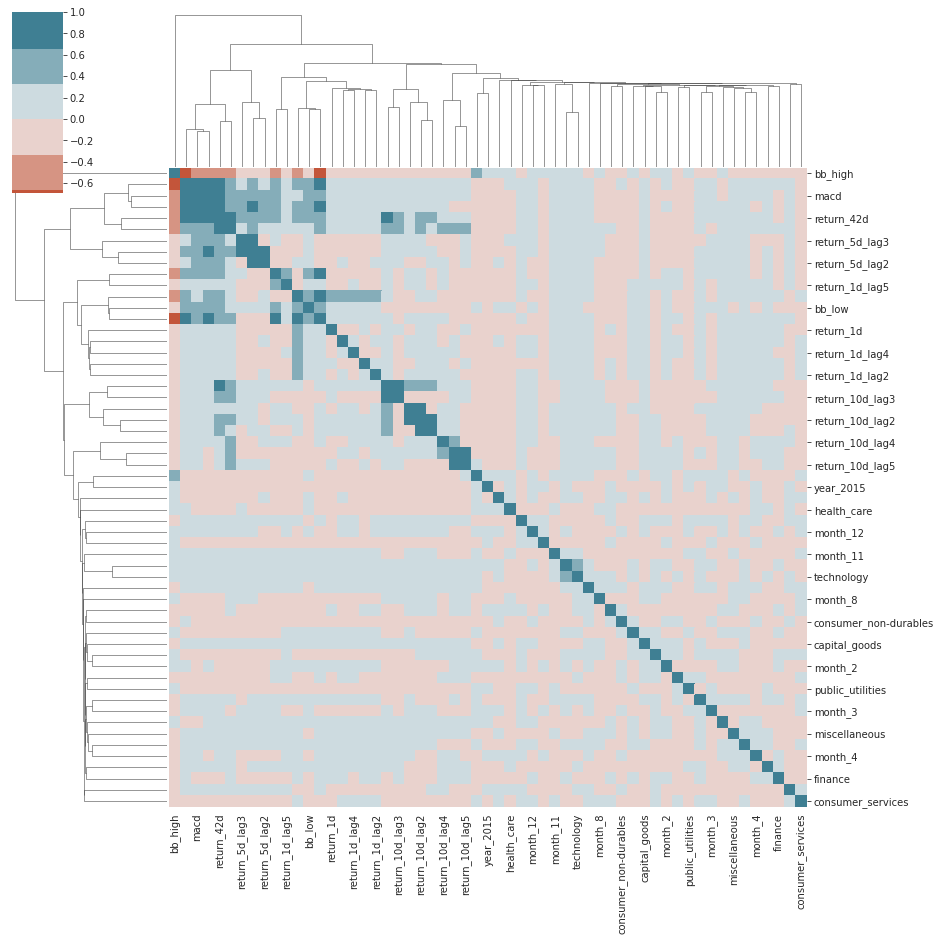

In [ ]:
sns.clustermap(X.corr(), cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0);
plt.gcf().set_size_inches((14, 14))

In [ ]:
corr_mat = X.corr().stack().reset_index()
corr_mat.columns=['var1', 'var2', 'corr']
corr_mat = corr_mat[corr_mat.var1!=corr_mat.var2].sort_values(by='corr', ascending=False)

In [ ]:
corr_mat.head().append(corr_mat.tail())

,var1,var2,corr
581,return_42d,return_63d,0.84
637,return_63d,return_42d,0.84
286,macd,rsi,0.82
62,rsi,macd,0.82
518,return_21d,macd,0.79
515,return_21d,bb_high,-0.63
122,bb_high,return_10d,-0.69
458,return_10d,bb_high,-0.69
59,rsi,bb_high,-0.70
115,bb_high,rsi,-0.70


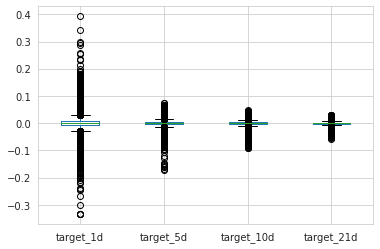

In [ ]:
y.boxplot();

## Linear Regression for Statistical Inference: OLS with statsmodels

### Ticker-wise standardization

`statsmodels` warns of high design matrix condition numbers. This can arise when the variables are not standardized and the Eigenvalues differ due to scaling. The following step avoids this warning.

In [ ]:
sectors = X.iloc[:, -10:]
X = (X.drop(sectors.columns, axis=1)
     .groupby(level='ticker')
     .transform(lambda x: (x - x.mean()) / x.std())
    .join(sectors)
    .fillna(0))

### 1-Day Returns

In [ ]:
target = 'target_1d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:              target_1d   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     19.03
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          9.43e-189
Time:                        20:49:38   Log-Likelihood:             2.8852e+05
No. Observations:              109675   AIC:                        -5.769e+05
Df Residuals:                  109617   BIC:                        -5.764e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

### 5-Day Returns

In [ ]:
target = 'target_5d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:              target_5d   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     61.86
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:49:39   Log-Likelihood:             3.7883e+05
No. Observations:              109675   AIC:                        -7.575e+05
Df Residuals:                  109617   BIC:                        -7.570e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

#### Obtain the residuals

In [ ]:
preds = trained_model.predict(add_constant(X))
residuals = y[target] - preds

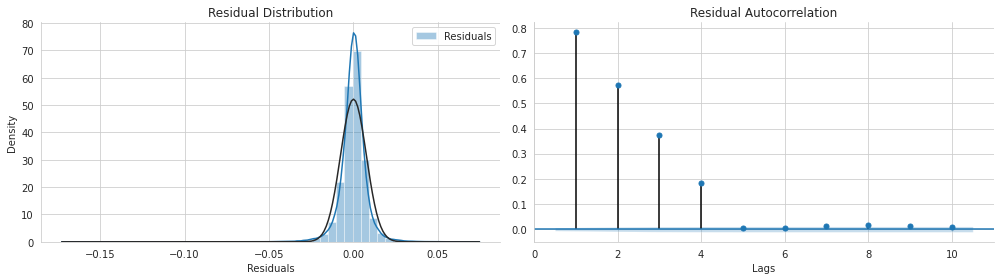

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();

### 10-Day Returns

In [ ]:
target = 'target_10d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:             target_10d   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     85.38
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:49:45   Log-Likelihood:             4.1892e+05
No. Observations:              109675   AIC:                        -8.377e+05
Df Residuals:                  109617   BIC:                        -8.372e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

### Monthly Returns

In [ ]:
target = 'target_21d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:             target_21d   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     119.7
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:49:46   Log-Likelihood:             4.6155e+05
No. Observations:              109675   AIC:                        -9.230e+05
Df Residuals:                  109617   BIC:                        -9.224e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

# Prediction stock returns with linear regression

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

from time import time
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
sns.set_style('darkgrid')
idx = pd.IndexSlice

In [ ]:
YEAR = 252

## Load Data

In [ ]:
with pd.HDFStore('data.h5') as store:
    data = (store['model_data']
            .dropna()
            .drop(['open', 'close', 'low', 'high'], axis=1))

In [ ]:
data.index.names = ['symbol', 'date']

In [ ]:
data = data.drop([c for c in data.columns if 'lag' in c], axis=1)

### Select Investment Universe

In [ ]:
data = data[data.dollar_vol_rank<100]

In [ ]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109675 entries, ('AAL', Timestamp('2013-07-25 00:00:00')) to ('ZTS', Timestamp('2014-12-04 00:00:00'))
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   volume                 109675 non-null  float64
 1   dollar_vol             109675 non-null  float64
 2   dollar_vol_1m          109675 non-null  float64
 3   dollar_vol_rank        109675 non-null  float64
 4   rsi                    109675 non-null  float64
 5   bb_high                109675 non-null  float64
 6   bb_low                 109675 non-null  float64
 7   atr                    109675 non-null  float64
 8   macd                   109675 non-null  float64
 9   return_1d              109675 non-null  float64
 10  return_5d              109675 non-null  float64
 11  return_10d             109675 non-null  float64
 12  return_21d             109675 non-null  float64
 13  return_42d    

### Create Model Data

In [ ]:
y = data.filter(like='target')
X = data.drop(y.columns, axis=1)
X = X.drop(['dollar_vol', 'dollar_vol_rank', 'volume', 'consumer_durables'], axis=1)

## Custom MultipleTimeSeriesCV

In [ ]:
class MultipleTimeSeriesCV:
    """Generates tuples of train_idx, test_idx pairs
    Assumes the MultiIndex contains levels 'symbol' and 'date'
    purges overlapping outcomes"""

    def __init__(self,
                 n_splits=3,
                 train_period_length=126,
                 test_period_length=21,
                 lookahead=None,
                 shuffle=False):
        self.n_splits = n_splits
        self.lookahead = lookahead
        self.test_length = test_period_length
        self.train_length = train_period_length
        self.shuffle = shuffle

    def split(self, X, y=None, groups=None):
        unique_dates = X.index.get_level_values('date').unique()
        days = sorted(unique_dates, reverse=True)

        split_idx = []
        for i in range(self.n_splits):
            test_end_idx = i * self.test_length
            test_start_idx = test_end_idx + self.test_length
            train_end_idx = test_start_idx + + self.lookahead - 1
            train_start_idx = train_end_idx + self.train_length + self.lookahead - 1
            split_idx.append([train_start_idx, train_end_idx,
                              test_start_idx, test_end_idx])

        dates = X.reset_index()[['date']]
        for train_start, train_end, test_start, test_end in split_idx:
            train_idx = dates[(dates.date > days[train_start])
                              & (dates.date <= days[train_end])].index
            test_idx = dates[(dates.date > days[test_start])
                             & (dates.date <= days[test_end])].index
            if self.shuffle:
                np.random.shuffle(list(train_idx))
            yield train_idx, test_idx

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits

### Verify that it works

In [ ]:
train_period_length = 63
test_period_length = 10
n_splits = int(3 * YEAR/test_period_length)
lookahead =1 

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

In [ ]:
i = 0
for train_idx, test_idx in cv.split(X=data):
    train = data.iloc[train_idx]
    train_dates = train.index.get_level_values('date')
    test = data.iloc[test_idx]
    test_dates = test.index.get_level_values('date')
    df = train.reset_index().append(test.reset_index())
    n = len(df)
    assert n== len(df.drop_duplicates())
    print(train.groupby(level='symbol').size().value_counts().index[0],
          train_dates.min().date(), train_dates.max().date(),
          test.groupby(level='symbol').size().value_counts().index[0],
          test_dates.min().date(), test_dates.max().date())
    i += 1
    if i == 10:
        break

63 2017-08-16 2017-11-14 10 2017-11-15 2017-11-29
63 2017-08-02 2017-10-30 10 2017-10-31 2017-11-14
63 2017-07-19 2017-10-16 10 2017-10-17 2017-10-30
63 2017-07-05 2017-10-02 10 2017-10-03 2017-10-16
63 2017-06-20 2017-09-18 10 2017-09-19 2017-10-02
63 2017-06-06 2017-09-01 10 2017-09-05 2017-09-18
63 2017-05-22 2017-08-18 10 2017-08-21 2017-09-01
63 2017-05-08 2017-08-04 10 2017-08-07 2017-08-18
63 2017-04-24 2017-07-21 10 2017-07-24 2017-08-04
62 2017-04-10 2017-07-07 10 2017-07-10 2017-07-21


## Visualization helper functions

### Prediction vs Actual Scatter Plot

In [ ]:
def plot_preds_scatter(df, ticker=None):
    if ticker is not None:
        idx = pd.IndexSlice
        df = df.loc[idx[ticker, :], :]
    j = sns.jointplot(x='predicted', y='actuals',
                      robust=True, ci=None,
                      line_kws={'lw': 1, 'color': 'k'},
                      scatter_kws={'s': 1},
                      data=df,
                      kind='reg')
    j.ax_joint.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    j.ax_joint.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
    j.ax_joint.set_xlabel('Predicted')
    j.ax_joint.set_ylabel('Actuals')

### Daily IC Distribution

In [ ]:
def plot_ic_distribution(df, ax=None):
    if ax is not None:
        sns.distplot(df.ic, ax=ax)
    else:
        ax = sns.distplot(df.ic)
    mean, median = df.ic.mean(), df.ic.median()
    ax.axvline(0, lw=1, ls='--', c='k')
    ax.text(x=.05, y=.9,
            s=f'Mean: {mean:8.2f}\nMedian: {median:5.2f}',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_xlabel('Information Coefficient')
    sns.despine()
    plt.tight_layout()

### Rolling Daily IC

In [ ]:
def plot_rolling_ic(df):
    fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(14, 8))
    rolling_result = df.sort_index().rolling(21).mean().dropna()
    mean_ic = df.ic.mean()
    rolling_result.ic.plot(ax=axes[0],
                           title=f'Information Coefficient (Mean: {mean_ic:.2f})',
                           lw=1)
    axes[0].axhline(0, lw=.5, ls='-', color='k')
    axes[0].axhline(mean_ic, lw=1, ls='--', color='k')

    mean_rmse = df.rmse.mean()
    rolling_result.rmse.plot(ax=axes[1],
                             title=f'Root Mean Squared Error (Mean: {mean_rmse:.2%})',
                             lw=1,
                             ylim=(0, df.rmse.max()))
    axes[1].axhline(df.rmse.mean(), lw=1, ls='--', color='k')
    sns.despine()
    plt.tight_layout()

## Linear Regression with sklearn

### Set up cross-validation

In [ ]:
train_period_length = 63
test_period_length = 10
n_splits = int(3 * YEAR / test_period_length)
lookahead = 1

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

### Run cross-validation with LinearRegression 

In [ ]:
%%time
target = f'target_{lookahead}d'
lr_predictions, lr_scores = [], []
lr = LinearRegression()
for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
    X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]
    lr.fit(X=X_train, y=y_train)
    y_pred = lr.predict(X_test)

    preds = y_test.to_frame('actuals').assign(predicted=y_pred)
    preds_by_day = preds.groupby(level='date')
    scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                               x.actuals)[0] * 100)
                        .to_frame('ic'),
                        preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                y_true=x.actuals)))
                        .to_frame('rmse')], axis=1)

    lr_scores.append(scores)
    lr_predictions.append(preds)

lr_scores = pd.concat(lr_scores)
lr_predictions = pd.concat(lr_predictions)

CPU times: user 5.09 s, sys: 7.62 s, total: 12.7 s
Wall time: 6.84 s


### Persist results

In [ ]:
lr_scores.to_hdf('data.h5', 'lr/scores')
lr_predictions.to_hdf('data.h5', 'lr/predictions')

In [ ]:
lr_scores = pd.read_hdf('data.h5', 'lr/scores')
lr_predictions = pd.read_hdf('data.h5', 'lr/predictions')

### Evaluate results

In [ ]:
lr_r, lr_p = spearmanr(lr_predictions.actuals, lr_predictions.predicted)
print(f'Information Coefficient (overall): {lr_r:.3%} (p-value: {lr_p:.4%})')

Information Coefficient (overall): 1.531% (p-value: 0.0031%)


#### Prediction vs Actuals Scatter

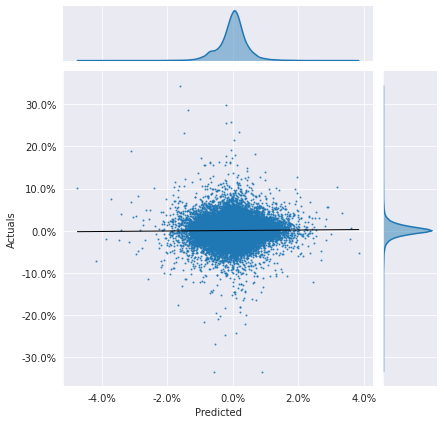

In [ ]:
plot_preds_scatter(lr_predictions)

#### Daily IC Distribution

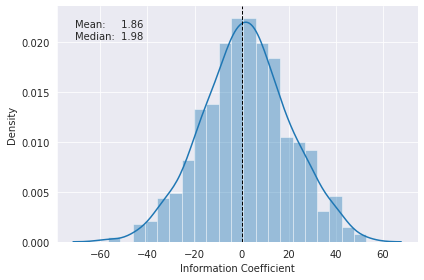

In [ ]:
plot_ic_distribution(lr_scores)

#### Rolling Daily IC

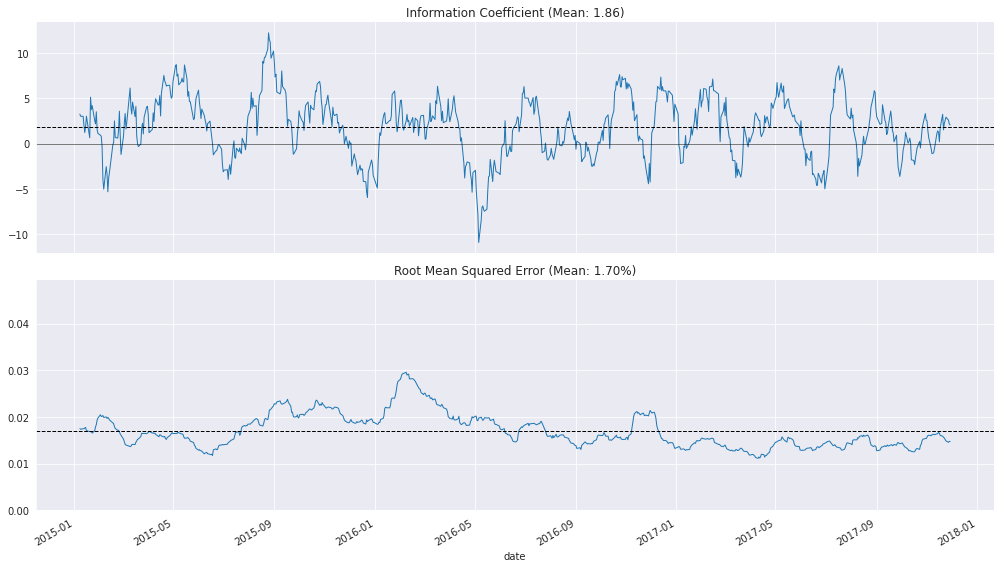

In [ ]:
plot_rolling_ic(lr_scores)

## Ridge Regression

### Define cross-validation parameters

In [ ]:
ridge_alphas = np.logspace(-4, 4, 9)
ridge_alphas = sorted(list(ridge_alphas) + list(ridge_alphas * 5))

In [ ]:
n_splits = int(3 * YEAR/test_period_length)
train_period_length = 63
test_period_length = 10
lookahead = 1

cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

### Run cross-validation

In [ ]:
target = f'target_{lookahead}d'

X = X.drop([c for c in X.columns if 'year' in c], axis=1)

In [ ]:
%%time
ridge_coeffs, ridge_scores, ridge_predictions = {}, [], []

for alpha in ridge_alphas:
    print(alpha, end=' ', flush=True)
    start = time()
    model = Ridge(alpha=alpha,
                  fit_intercept=False,
                  random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])

    coeffs = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
        X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]

        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_test)

        preds = y_test.to_frame('actuals').assign(predicted=y_pred)
        preds_by_day = preds.groupby(level='date')
        scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                                   x.actuals)[0] * 100)
                            .to_frame('ic'),
                            preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                    y_true=x.actuals)))
                            .to_frame('rmse')], axis=1)

        ridge_scores.append(scores.assign(alpha=alpha))
        ridge_predictions.append(preds.assign(alpha=alpha))

        coeffs.append(pipe.named_steps['model'].coef_)
    ridge_coeffs[alpha] = np.mean(coeffs, axis=0)

print('\n')

0.0001 0.0005 0.001 0.005 0.01 0.05 0.1 0.5 1.0 5.0 10.0 50.0 100.0 500.0 1000.0 5000.0 10000.0 50000.0 

CPU times: user 1min 16s, sys: 59.4 s, total: 2min 15s
Wall time: 1min 10s


### Persist results

In [ ]:
ridge_scores = pd.concat(ridge_scores)
ridge_scores.to_hdf('data.h5', 'ridge/scores')

ridge_coeffs = pd.DataFrame(ridge_coeffs, index=X.columns).T
ridge_coeffs.to_hdf('data.h5', 'ridge/coeffs')

ridge_predictions = pd.concat(ridge_predictions)
ridge_predictions.to_hdf('data.h5', 'ridge/predictions')

In [ ]:
ridge_scores = pd.read_hdf('data.h5', 'ridge/scores')
ridge_coeffs = pd.read_hdf('data.h5', 'ridge/coeffs')
ridge_predictions = pd.read_hdf('data.h5', 'ridge/predictions')

### Evaluate Ridge Results

In [ ]:
ridge_r, ridge_p = spearmanr(ridge_predictions.actuals, ridge_predictions.predicted)
print(f'Information Coefficient (overall): {ridge_r:.3%} (p-value: {ridge_p:.4%})')

Information Coefficient (overall): 1.551% (p-value: 0.0000%)


In [ ]:
ridge_scores.groupby('alpha').ic.describe()

,count,mean,std,min,25%,50%,75%,max
alpha,,,,,,,,
0.00,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.00,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.00,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.01,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.01,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.05,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.10,750.00,1.86,18.57,-56.79,-10.01,1.98,14.10,53.02
0.50,750.00,1.86,18.57,-56.84,-10.00,1.97,14.12,53.03
1.00,750.00,1.86,18.57,-56.84,-10.00,1.97,14.11,53.16


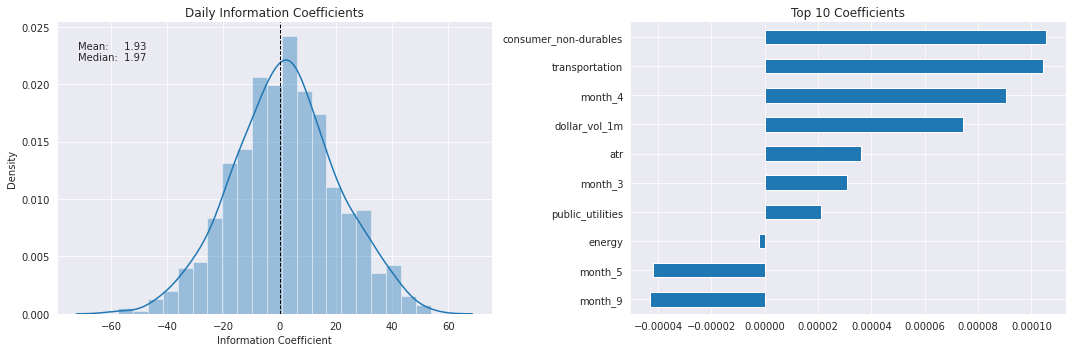

In [ ]:
best_alpha = ridge_scores.groupby('alpha').ic.mean().idxmax()
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plot_ic_distribution(ridge_scores[ridge_scores.alpha == best_alpha],
                     ax=axes[0])
axes[0].set_title('Daily Information Coefficients')
top_coeffs = ridge_coeffs.loc[best_alpha].abs().sort_values().head(10).index
top_coeffs.tolist()
ridge_coeffs.loc[best_alpha, top_coeffs].sort_values().plot.barh(ax=axes[1],
                                                                 title='Top 10 Coefficients')
sns.despine()
fig.tight_layout()

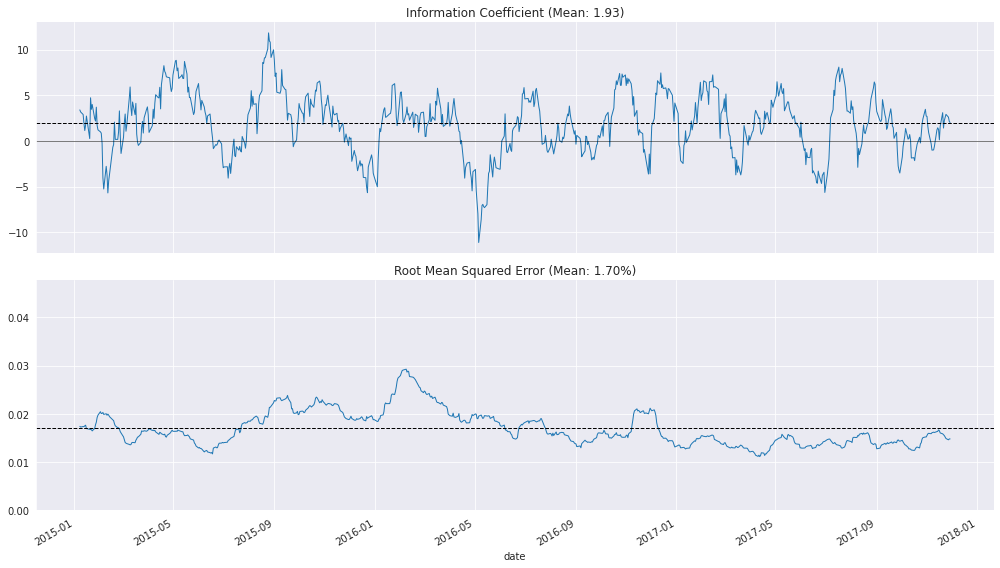

In [ ]:
plot_rolling_ic(ridge_scores[ridge_scores.alpha==best_alpha])

## Lasso CV

### Define cross-validation parameters

In [ ]:
lasso_alphas = np.logspace(-10, -3, 8)

In [ ]:
train_period_length = 63
test_period_length = 10
YEAR = 252
n_splits = int(3 * YEAR / test_period_length) # three years
lookahead = 1

In [ ]:
cv = MultipleTimeSeriesCV(n_splits=n_splits,
                          test_period_length=test_period_length,
                          lookahead=lookahead,
                          train_period_length=train_period_length)

### Run cross-validation with Lasso regression

In [ ]:
target = f'target_{lookahead}d'

scaler = StandardScaler()
X = X.drop([c for c in X.columns if 'year' in c], axis=1)

In [ ]:
%%time

lasso_coeffs, lasso_scores, lasso_predictions = {}, [], []
for alpha in lasso_alphas:
    print(alpha, end=' ', flush=True)
    model = Lasso(alpha=alpha,
                  fit_intercept=False,  # StandardScaler centers data
                  random_state=42,
                  tol=1e-3,
                  max_iter=1000,
                  warm_start=True,
                  selection='random')

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])
    coeffs = []
    for i, (train_idx, test_idx) in enumerate(cv.split(X), 1):
        t = time()
        X_train, y_train, = X.iloc[train_idx], y[target].iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y[target].iloc[test_idx]

        pipe.fit(X=X_train, y=y_train)
        y_pred = pipe.predict(X_test)

        preds = y_test.to_frame('actuals').assign(predicted=y_pred)
        preds_by_day = preds.groupby(level='date')
        scores = pd.concat([preds_by_day.apply(lambda x: spearmanr(x.predicted,
                                                                   x.actuals)[0] * 100)
                            .to_frame('ic'),
                            preds_by_day.apply(lambda x: np.sqrt(mean_squared_error(y_pred=x.predicted,
                                                                                    y_true=x.actuals)))
                            .to_frame('rmse')],
                           axis=1)

        lasso_scores.append(scores.assign(alpha=alpha))
        lasso_predictions.append(preds.assign(alpha=alpha))

        coeffs.append(pipe.named_steps['model'].coef_)

    lasso_coeffs[alpha] = np.mean(coeffs, axis=0)

1e-10 1e-09 1e-08 1e-07 1e-06 1e-05 0.0001 0.001 CPU times: user 1min 53s, sys: 1min 39s, total: 3min 33s
Wall time: 1min 50s


### Persist results

In [ ]:
lasso_scores = pd.concat(lasso_scores)
lasso_scores.to_hdf('data.h5', 'lasso/scores')

lasso_coeffs = pd.DataFrame(lasso_coeffs, index=X.columns).T
lasso_coeffs.to_hdf('data.h5', 'lasso/coeffs')

lasso_predictions = pd.concat(lasso_predictions)
lasso_predictions.to_hdf('data.h5', 'lasso/predictions')

### Evaluate Lasso Results

In [ ]:
best_alpha = lasso_scores.groupby('alpha').ic.mean().idxmax()
preds = lasso_predictions[lasso_predictions.alpha==best_alpha]

lasso_r, lasso_p = spearmanr(preds.actuals, preds.predicted)
print(f'Information Coefficient (overall): {lasso_r:.3%} (p-value: {lasso_p:.4%})')

Information Coefficient (overall): 3.595% (p-value: 0.0000%)


In [ ]:
lasso_scores.groupby('alpha').ic.agg(['mean', 'median'])

,mean,median
alpha,,
0.00,1.86,1.98
0.00,1.86,1.98
0.00,1.86,1.98
0.00,1.87,1.97
0.00,1.88,1.96
0.00,1.94,2.19
0.00,1.58,1.01
0.00,1.03,1.77


### Lasso Coefficient Path

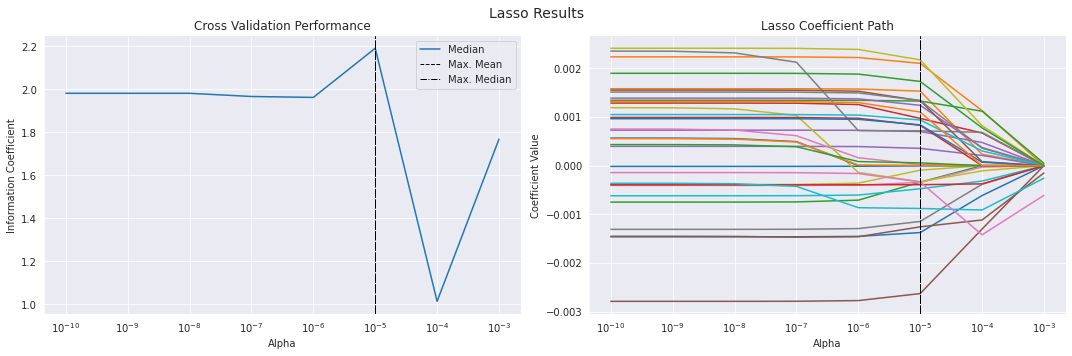

In [ ]:
fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(15, 5))

scores_by_alpha = lasso_scores.groupby('alpha').ic.agg(['mean', 'median'])
best_alpha_mean = scores_by_alpha['mean'].idxmax()
best_alpha_median = scores_by_alpha['median'].idxmax()


scores_by_alpha['median'].plot(logx=True, ax=axes[0], label='Median')

axes[0].axvline(best_alpha_mean, ls='--', c='k', lw=1, label='Max. Mean')
axes[0].axvline(best_alpha_median, ls='-.', c='k', lw=1, label='Max. Median')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Information Coefficient')
axes[0].set_title('Cross Validation Performance')

lasso_coeffs.plot(logx=True, legend=False, ax=axes[1], title='Lasso Coefficient Path')
axes[1].axvline(best_alpha_mean, ls='--', c='k', lw=1, label='Max. Mean')
axes[1].axvline(best_alpha_median, ls='-.', c='k', lw=1, label='Max. Median')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Coefficient Value')

fig.suptitle('Lasso Results', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=.9)
sns.despine();

### Lasso IC Distribution and Top 10 Features

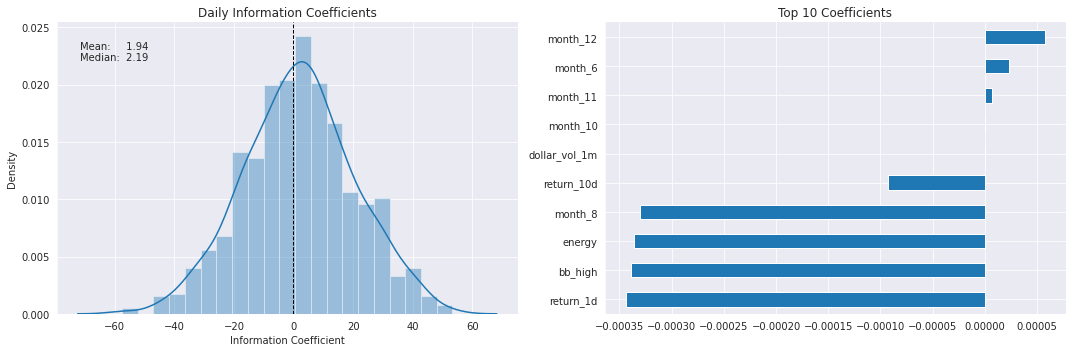

In [ ]:
best_alpha = lasso_scores.groupby('alpha').ic.mean().idxmax()

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plot_ic_distribution(lasso_scores[lasso_scores.alpha==best_alpha], ax=axes[0])
axes[0].set_title('Daily Information Coefficients')

top_coeffs = lasso_coeffs.loc[best_alpha].abs().sort_values().head(10).index
top_coeffs.tolist()
lasso_coeffs.loc[best_alpha, top_coeffs].sort_values().plot.barh(ax=axes[1], title='Top 10 Coefficients')

sns.despine()
fig.tight_layout();

## Compare results

In [ ]:
best_ridge_alpha = ridge_scores.groupby('alpha').ic.mean().idxmax()
best_ridge_preds = ridge_predictions[ridge_predictions.alpha==best_ridge_alpha]
best_ridge_scores = ridge_scores[ridge_scores.alpha==best_ridge_alpha]

In [ ]:
best_lasso_alpha = lasso_scores.groupby('alpha').ic.mean().idxmax()
best_lasso_preds = lasso_predictions[lasso_predictions.alpha==best_lasso_alpha]
best_lasso_scores = lasso_scores[lasso_scores.alpha==best_lasso_alpha]

In [ ]:
df = pd.concat([lr_scores.assign(Model='Linear Regression'),
               best_ridge_scores.assign(Model='Ridge Regression'),
               best_lasso_scores.assign(Model='Lasso Regression')]).drop('alpha', axis=1)
df.columns = ['IC', 'RMSE', 'Model']

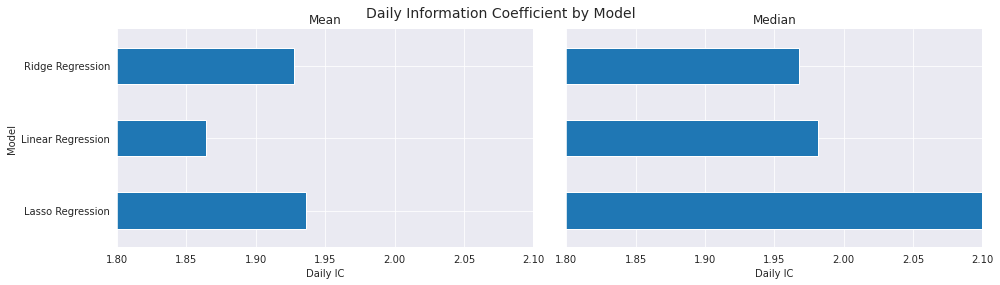

In [ ]:
scores = df.groupby('Model').IC.agg(['mean', 'median'])
fig, axes = plt.subplots(ncols=2, figsize=(14,4), sharey=True, sharex=True)

scores['mean'].plot.barh(ax=axes[0], xlim=(1.85, 2), title='Mean')
scores['median'].plot.barh(ax=axes[1], xlim=(1.8, 2.1), title='Median')
axes[0].set_xlabel('Daily IC')
axes[1].set_xlabel('Daily IC')

fig.suptitle('Daily Information Coefficient by Model', fontsize=14)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)

# Alphalens Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install alphalens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 MB/s eta 0:00:00
  Created wheel for alphalens: filename=alphalens-0.4.0-py3-none-any.whl size=24027572 sha256=8b2fcefd1a99c2bece8b425005813634f92170a1dc8ffe7631cf90452d15ac29
  Stored in directory: /root/.cache/pip/wheels/d0/98/5e/0ed3525e718b2a0811926b869a5e5db6d874c8b071af56a478
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39778 sha256=f789ba54832bdb5583d61108a2734bfbaba7fb8061f25f73df677f5346236204
  Stored in directory: /root/.cache/pip/wheels/0d/68/bb/926065fb744e7d7cb67334cb1a9c696722abc8303e5dc9a8d0
Successfully built alphalens empyrical


In [ ]:
from pathlib import Path
import pandas as pd
from alphalens.tears import create_summary_tear_sheet
from alphalens.utils import get_clean_factor_and_forward_returns

In [ ]:
idx = pd.IndexSlice

## Load Data

In [ ]:
with pd.HDFStore('data.h5') as store:
    lr_predictions = store['lr/predictions']
    lasso_predictions = store['lasso/predictions']
    lasso_scores = store['lasso/scores']
    ridge_predictions = store['ridge/predictions']
    ridge_scores = store['ridge/scores']

In [ ]:
DATA_STORE = Path('..', 'data', 'assets.h5')

In [ ]:
df = (pd.read_csv('wiki_prices.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True)
     .sort_index())

In [ ]:
def get_trade_prices(tickers, start, stop,df):
    prices = (df.swaplevel().sort_index())
    prices.index.names = ['symbol', 'date']
    prices = prices.loc[idx[tickers, str(start):str(stop)], 'adj_open']
    return (prices
            .unstack('symbol')
            .sort_index()
            .shift(-1)
            .tz_localize('UTC'))

In [ ]:
def get_best_alpha(scores):
    return scores.groupby('alpha').ic.mean().idxmax()

In [ ]:
def get_factor(predictions):
    return (predictions.unstack('symbol')
            .dropna(how='all')
            .stack()
            .tz_localize('UTC', level='date')
            .sort_index())    

## Linear Regression

In [ ]:
lr_factor = get_factor(lr_predictions.predicted.swaplevel())
lr_factor.head()

date                       symbol
2014-12-09 00:00:00+00:00  AAL       0.00
                           AAPL     -0.00
                           ABBV      0.00
                           AGN       0.00
                           AIG      -0.00
dtype: float64

In [ ]:
tickers = lr_factor.index.get_level_values('symbol').unique()

In [ ]:
!ls

data.h5      WIKI_PRICES_212b326a081eacca455e13140d7bb9db.zip
sample_data  wiki_prices.csv


In [ ]:
trade_prices = get_trade_prices(tickers, 2014, 2017,df)
trade_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2014-01-02 00:00:00+00:00 to 2017-12-29 00:00:00+00:00
Columns: 257 entries, AAL to GWW
dtypes: float64(257)
memory usage: 2.0 MB


In [ ]:
lr_factor_data = get_clean_factor_and_forward_returns(factor=lr_factor,
                                                      prices=trade_prices,
                                                      quantiles=5,
                                                      periods=(1, 5, 10, 21))
lr_factor_data.info()

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74054 entries, (Timestamp('2014-12-09 00:00:00+0000', tz='UTC', freq='C'), 'AAL') to (Timestamp('2017-11-29 00:00:00+0000', tz='UTC', freq='C'), 'XOM')
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               74054 non-null  float64
 1   5D               74054 non-null  float64
 2   10D              74054 non-null  float64
 3   21D              74054 non-null  float64
 4   factor           74054 non-null  float64
 5   factor_quantile  74054 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.7+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.05,0.01,-0.00,0.00,14982,20.23
2,-0.02,0.01,-0.00,0.00,14877,20.09
3,-0.01,0.01,0.00,0.00,14336,19.36
4,-0.01,0.01,0.00,0.00,14877,20.09
5,-0.01,0.04,0.00,0.00,14982,20.23


Returns Analysis


,1D,5D,10D,21D
Ann. alpha,0.03,0.02,0.01,0.01
beta,-0.01,-0.08,-0.06,0.01
Mean Period Wise Return Top Quantile (bps),1.11,0.72,0.03,0.21
Mean Period Wise Return Bottom Quantile (bps),-2.87,-0.71,-0.52,-0.74
Mean Period Wise Spread (bps),3.98,1.47,0.57,0.94


Information Analysis


,1D,5D,10D,21D
IC Mean,0.02,0.01,0.01,0.01
IC Std.,0.18,0.17,0.17,0.15
Risk-Adjusted IC,0.11,0.08,0.08,0.09
t-stat(IC),2.96,2.17,2.10,2.56
p-value(IC),0.00,0.03,0.04,0.01
IC Skew,0.01,-0.02,-0.03,-0.02
IC Kurtosis,-0.13,-0.18,-0.15,-0.29


Turnover Analysis


,1D,5D,10D,21D
Quantile 1 Mean Turnover,0.30,0.52,0.62,0.73
Quantile 2 Mean Turnover,0.52,0.71,0.76,0.79
Quantile 3 Mean Turnover,0.57,0.74,0.78,0.80
Quantile 4 Mean Turnover,0.51,0.70,0.75,0.78
Quantile 5 Mean Turnover,0.30,0.53,0.64,0.74


,1D,5D,10D,21D
Mean Factor Rank Autocorrelation,0.82,0.55,0.39,0.24


<Figure size 432x288 with 0 Axes>

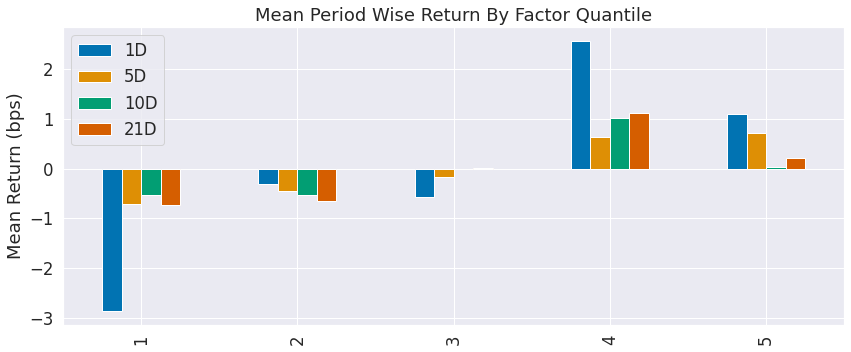

In [ ]:
create_summary_tear_sheet(lr_factor_data);

## Ridge Regression

In [ ]:
best_ridge_alpha = get_best_alpha(ridge_scores)
ridge_predictions = ridge_predictions[ridge_predictions.alpha==best_ridge_alpha].drop('alpha', axis=1)

In [ ]:
ridge_factor = get_factor(ridge_predictions.predicted.swaplevel())
ridge_factor.head()

date                       symbol
2014-12-09 00:00:00+00:00  AAL       0.00
                           AAPL     -0.00
                           ABBV      0.00
                           AGN       0.00
                           AIG      -0.00
dtype: float64

In [ ]:
ridge_factor_data = get_clean_factor_and_forward_returns(factor=ridge_factor,
                                                         prices=trade_prices,
                                                         quantiles=5,
                                                         periods=(1, 5, 10, 21))
ridge_factor_data.info()

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74054 entries, (Timestamp('2014-12-09 00:00:00+0000', tz='UTC', freq='C'), 'AAL') to (Timestamp('2017-11-29 00:00:00+0000', tz='UTC', freq='C'), 'XOM')
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               74054 non-null  float64
 1   5D               74054 non-null  float64
 2   10D              74054 non-null  float64
 3   21D              74054 non-null  float64
 4   factor           74054 non-null  float64
 5   factor_quantile  74054 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.7+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.04,0.01,-0.00,0.00,14982,20.23
2,-0.01,0.01,-0.00,0.00,14877,20.09
3,-0.01,0.01,-0.00,0.00,14336,19.36
4,-0.01,0.02,0.00,0.00,14877,20.09
5,-0.01,0.04,0.00,0.00,14982,20.23


Returns Analysis


,1D,5D,10D,21D
Ann. alpha,0.03,0.02,0.01,0.01
beta,-0.01,-0.08,-0.06,0.01
Mean Period Wise Return Top Quantile (bps),1.38,0.55,0.07,0.21
Mean Period Wise Return Bottom Quantile (bps),-2.78,-1.34,-1.04,-1.15
Mean Period Wise Spread (bps),4.15,1.92,1.14,1.35


Information Analysis


,1D,5D,10D,21D
IC Mean,0.02,0.01,0.01,0.01
IC Std.,0.18,0.17,0.17,0.15
Risk-Adjusted IC,0.11,0.08,0.08,0.09
t-stat(IC),3.01,2.28,2.18,2.45
p-value(IC),0.00,0.02,0.03,0.01
IC Skew,0.00,-0.02,-0.04,-0.03
IC Kurtosis,-0.14,-0.19,-0.15,-0.28


Turnover Analysis


,1D,5D,10D,21D
Quantile 1 Mean Turnover,0.29,0.51,0.62,0.72
Quantile 2 Mean Turnover,0.51,0.70,0.75,0.79
Quantile 3 Mean Turnover,0.56,0.73,0.78,0.81
Quantile 4 Mean Turnover,0.50,0.69,0.75,0.79
Quantile 5 Mean Turnover,0.30,0.52,0.63,0.74


,1D,5D,10D,21D
Mean Factor Rank Autocorrelation,0.82,0.56,0.41,0.25


<Figure size 432x288 with 0 Axes>

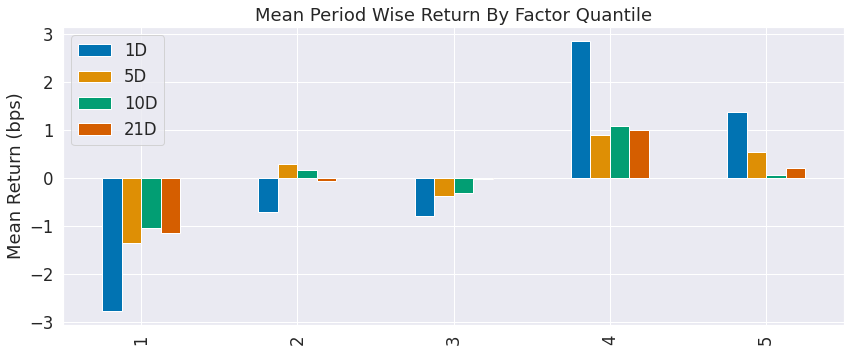

In [ ]:
create_summary_tear_sheet(ridge_factor_data);

## Lasso Regression

In [ ]:
best_lasso_alpha = get_best_alpha(lasso_scores)
lasso_predictions = lasso_predictions[lasso_predictions.alpha==best_lasso_alpha].drop('alpha', axis=1)

In [ ]:
lasso_factor = get_factor(lasso_predictions.predicted.swaplevel())
lasso_factor.head()

date                       symbol
2014-12-09 00:00:00+00:00  AAL       0.00
                           AAPL     -0.00
                           ABBV      0.00
                           AGN       0.00
                           AIG      -0.00
dtype: float64

In [ ]:
lasso_factor_data = get_clean_factor_and_forward_returns(factor=lasso_factor,
                                                      prices=trade_prices,
                                                      quantiles=5,
                                                      periods=(1, 5, 10, 21))
lasso_factor_data.info()

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74054 entries, (Timestamp('2014-12-09 00:00:00+0000', tz='UTC', freq='C'), 'AAL') to (Timestamp('2017-11-29 00:00:00+0000', tz='UTC', freq='C'), 'XOM')
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1D               74054 non-null  float64
 1   5D               74054 non-null  float64
 2   10D              74054 non-null  float64
 3   21D              74054 non-null  float64
 4   factor           74054 non-null  float64
 5   factor_quantile  74054 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.7+ MB


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.04,0.01,-0.00,0.00,14982,20.23
2,-0.01,0.01,-0.00,0.00,14877,20.09
3,-0.01,0.01,-0.00,0.00,14336,19.36
4,-0.01,0.02,0.00,0.00,14877,20.09
5,-0.01,0.04,0.00,0.00,14982,20.23


Returns Analysis


,1D,5D,10D,21D
Ann. alpha,0.03,0.02,0.01,0.01
beta,-0.01,-0.08,-0.06,0.01
Mean Period Wise Return Top Quantile (bps),1.97,0.78,0.04,0.24
Mean Period Wise Return Bottom Quantile (bps),-2.51,-0.77,-0.76,-0.91
Mean Period Wise Spread (bps),4.47,1.58,0.83,1.13


Information Analysis


,1D,5D,10D,21D
IC Mean,0.02,0.01,0.01,0.01
IC Std.,0.18,0.17,0.17,0.15
Risk-Adjusted IC,0.11,0.08,0.07,0.09
t-stat(IC),3.04,2.24,2.06,2.55
p-value(IC),0.00,0.03,0.04,0.01
IC Skew,0.00,-0.01,-0.04,-0.02
IC Kurtosis,-0.15,-0.19,-0.16,-0.31


Turnover Analysis


,1D,5D,10D,21D
Quantile 1 Mean Turnover,0.30,0.52,0.62,0.73
Quantile 2 Mean Turnover,0.51,0.70,0.75,0.79
Quantile 3 Mean Turnover,0.57,0.74,0.78,0.81
Quantile 4 Mean Turnover,0.50,0.70,0.75,0.78
Quantile 5 Mean Turnover,0.30,0.53,0.64,0.74


,1D,5D,10D,21D
Mean Factor Rank Autocorrelation,0.82,0.55,0.40,0.24


<Figure size 432x288 with 0 Axes>

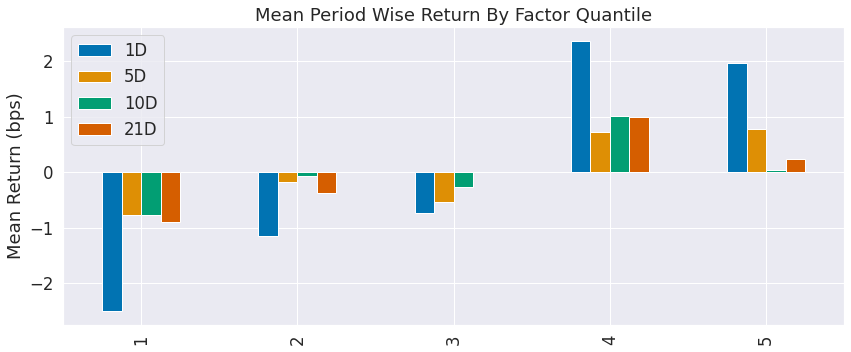

In [ ]:
create_summary_tear_sheet(lasso_factor_data);

<font color='orange'>Question 5: Explain with data, text, tables, or vizualisations which methods above performed best between standard linear regression, lasso regression, and ridge regression models (you can also speculate why the performed the way they did) (10 points) </font>



*   You can use a markdown cell to write  text if used.
*   Don't ask me how to answer this question, you can be creative.

